# Game of Life

In [1]:
import numpy as np
import numba
import skimage
from skimage import data, color, feature
import matplotlib.pyplot as plt

## Create image

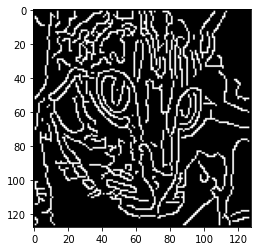

In [2]:
image = skimage.img_as_float(color.rgb2gray(data.chelsea())).astype(np.float32)
image = skimage.transform.resize(image, (128,128))
image = feature.canny(image, sigma=1)
fig = plt.figure()
plt.imshow(image, cmap=plt.cm.gray)

## Cellular Automata Update

In [3]:
@numba.jit
def apply_rules(image, out_image):
    # Prepare neighbouring indices
    idx = []
    for i in range(-1, 2):
        for j in range(-1, 2):
            if i == 0 and j == 0:
                continue
            idx.append([i, j])
    
    # Apply the cellular automata from "conways_game_of_life"
    for x in range(1, image.shape[0]-1):
        for y in range(1, image.shape[1]-1):
            num_neighbours = 0
            for i in range(len(idx)):
                if image[x+idx[i][0], y+idx[i][1]] == 1.0:
                    num_neighbours += 1

            out_image[x, y] = image[x, y]
            if out_image[x, y] == 1.0: # live cell
                if num_neighbours < 2: # under population.
                    out_image[x, y] = 0.0
                elif num_neighbours > 3: # overpopulation
                    out_image[x, y] = 0.0
            else:                        # dead cell 
                if num_neighbours == 3: # reproduction
                    out_image[x, y] = 1.0

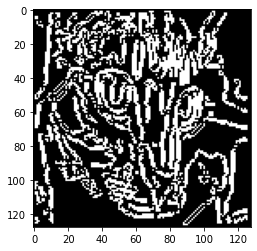

<Figure size 432x288 with 0 Axes>

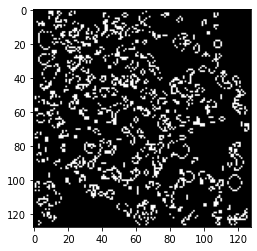

<Figure size 432x288 with 0 Axes>

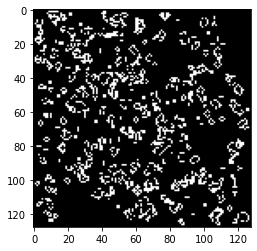

<Figure size 432x288 with 0 Axes>

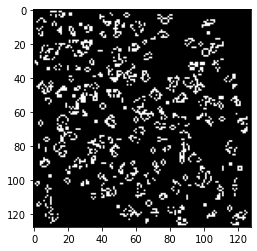

<Figure size 432x288 with 0 Axes>

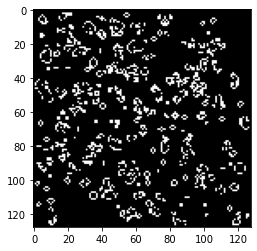

<Figure size 432x288 with 0 Axes>

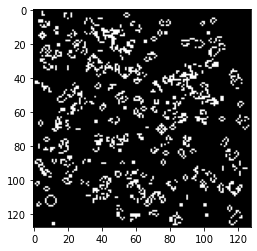

<Figure size 432x288 with 0 Axes>

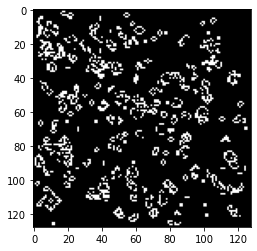

<Figure size 432x288 with 0 Axes>

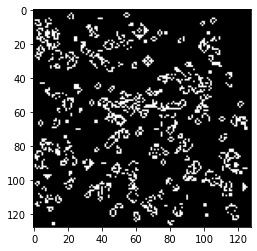

<Figure size 432x288 with 0 Axes>

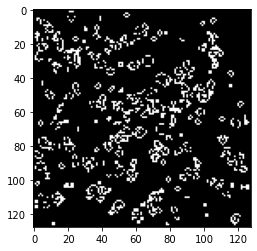

<Figure size 432x288 with 0 Axes>

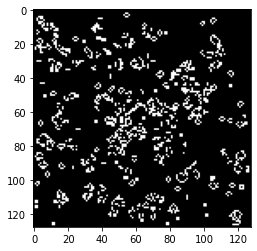

<Figure size 432x288 with 0 Axes>

In [4]:
NUM_ITERATIONS = 50
buffer = [np.copy(image), np.copy(image)]
for i in range(NUM_ITERATIONS):
    apply_rules(buffer[0], buffer[1])
    buffer[0], buffer[1] = buffer[1], buffer[0] # swap buffers
    if i%5 == 0:
        plt.imshow(buffer[0], cmap=plt.cm.gray)
        fig = plt.figure()
        plt.show()

## References

- Balasalle, James, Mario A. Lopez, and Matthew J. Rutherford. "Optimizing memory access patterns for cellular automata on GPUs." In GPU Computing Gems Jade Edition, pp. 67-75. 2011.
- Gardner, Martin. "Mathematical games: The fantastic combinations of John Conway’s new solitaire game “life”." Scientific American 223, no. 4 (1970): 120-123.